# **Spatial Transcriptomics Deep Learning (STDL) Project Notebook**

> The notebook contains main experiments and examples of how to use the code

## **Phase 1: Pre-processing and technical preparations**

### 1.1: **Assign GPU device and allow CUDA debugging**

In [1]:
# create code to reimport module if i change it
%load_ext autoreload

In [2]:
# the next 2 lines are to allow debugging with CUDA !
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"  
print(f'cuda debugging allowed')

cuda debugging allowed


In [3]:
%%time

import torch
print(f'cuda device count: {torch.cuda.device_count()}')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print(f'device name: {torch.cuda.get_device_name(0)}')
    print(f'torch.cuda.device(0): {torch.cuda.device(0)}')
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
# NOTE: important !!!!!!
# clearing out the cache before beginning
torch.cuda.empty_cache()

cuda device count: 1
Using device: cuda
device name: GeForce RTX 2080 Ti
torch.cuda.device(0): <torch.cuda.device object at 0x7f8e61c48fd0>
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
CPU times: user 2.82 s, sys: 4.52 s, total: 7.34 s
Wall time: 2.14 s


### 1.2: **Import the Pre-Process module**

> `loadAndPreProcess` module contains methods to load the data files as pytorch and pandas objects, methods to preprocess the given data, and methods to create custom datasets from the preprocessed data.

<div class="alert alert-block alert-warning">
<b>TODO:</b> fill above line
</div>

In [48]:
# note: path to project is: /home/roy.rubin/STDLproject/
%autoreload 2
import loadAndPreProcess

### 1.3: **Load pytorch dataset objects from the image folder**

> Note that `augmentedImageFolder` is a custom dataset of imageFolder objects with different transformations (see code).

In [5]:
%%time

path_to_images_dir_patient1_train = "/home/roy.rubin/STDLproject/spatialGeneExpressionData/patient1/images"
imageFolder_train = loadAndPreProcess.load_dataset_from_images_folder(path_to_images_dir_patient1_train)
augmentedImageFolder_train = loadAndPreProcess.load_augmented_imageFolder_DS_from_images_folder(path_to_images_dir_patient1_train)


----- entered function load_dataset_from_pictures_folder -----

----- finished function load_dataset_from_pictures_folder -----


----- entered function load_dataset_from_pictures_folder -----

----- finished function load_dataset_from_pictures_folder -----

CPU times: user 133 ms, sys: 14.7 ms, total: 147 ms
Wall time: 151 ms


In [6]:
%%time

path_to_images_dir_patient2_test = "/home/roy.rubin/STDLproject/spatialGeneExpressionData/patient2/images"
imageFolder_test = loadAndPreProcess.load_dataset_from_images_folder(path_to_images_dir_patient2_test)
# augmentedImageFolder_test = loadAndPreProcess.load_augmented_imageFolder_DS_from_images_folder(path_to_images_dir_patient2_test) # not needed for now


----- entered function load_dataset_from_pictures_folder -----

----- finished function load_dataset_from_pictures_folder -----

CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 15 ms


### 1.4: **Load pandas dataframe objects from the 3 given tsv/csv files**

> `matrix_dataframe` represents the gene expression count values of each sample for each gene

> `features_dataframe` contains the names of all the genes

> `barcodes_datafame` contains the names of all the samples

In [7]:
%%time

path_to_mtx_tsv_files_dir_patient1_train = "/home/roy.rubin/STDLproject/spatialGeneExpressionData/patient1"
matrix_dataframe_train, features_dataframe_train , barcodes_datafame_train = loadAndPreProcess.load_dataframes_from_mtx_and_tsv_new(path_to_mtx_tsv_files_dir_patient1_train)


----- entered function load_dataframes_from_mtx_and_tsv -----
started reading features.tsv
V  finished reading features.tsv
started reading barcodes.tsv
V  finished reading barcodes.tsv
started reading matrix.mtx. this might take some time ...
V  finished reading matrix.mtx
adjusting matrix_dataframe including type conversion, and NaN filling
V  finished working on matrix_dataframe

----- finished function load_dataframes_from_mtx_and_tsv -----

CPU times: user 1min 13s, sys: 1.22 s, total: 1min 14s
Wall time: 1min 14s


In [8]:
%%time

path_to_mtx_tsv_files_dir_patient2_test = "/home/roy.rubin/STDLproject/spatialGeneExpressionData/patient2"
matrix_dataframe_test, features_dataframe_test , barcodes_datafame_test = loadAndPreProcess.load_dataframes_from_mtx_and_tsv_new(path_to_mtx_tsv_files_dir_patient2_test)


----- entered function load_dataframes_from_mtx_and_tsv -----
started reading features.tsv
V  finished reading features.tsv
started reading barcodes.tsv
V  finished reading barcodes.tsv
started reading matrix.mtx. this might take some time ...
V  finished reading matrix.mtx
adjusting matrix_dataframe including type conversion, and NaN filling
V  finished working on matrix_dataframe

----- finished function load_dataframes_from_mtx_and_tsv -----

CPU times: user 1min 7s, sys: 847 ms, total: 1min 8s
Wall time: 1min 8s


### 1.5: **Remove less-informative genes**

> we define *less-informative* genes as genes with less than K counts over all samples

> K is a parameter for the user's choice

In [9]:
%%time

Base_value = 10
matrix_dataframe_train, mapping_between_old_and_new_indices_train = loadAndPreProcess.cut_genes_with_under_B_counts(matrix_dataframe_train, Base_value) 
# # uncomment if wanted:
# print(f'\nnote: this is the mapping_between_old_and_new_indices: \n{mapping_between_old_and_new_indices}')

cutting all genes (rows) that contain less than B counts ...
CPU times: user 11.4 s, sys: 4.46 s, total: 15.9 s
Wall time: 16 s


In [10]:
%%time

Base_value = 1
matrix_dataframe_test, mapping_between_old_and_new_indices_test = loadAndPreProcess.cut_genes_with_under_B_counts(matrix_dataframe_test, Base_value) 
#TODO: note that this actually is not really needed, but it is to not change the functions inside this class to adjust to the test data

# # uncomment if wanted:
# print(f'\nnote: this is the mapping_between_old_and_new_indices: \n{mapping_between_old_and_new_indices}')

cutting all genes (rows) that contain less than B counts ...
CPU times: user 10.3 s, sys: 572 ms, total: 10.9 s
Wall time: 10.9 s


### 1.6: **Normalize matrix_dataframe entries**

> normaliztion will be performed on the remainning rows of the dataframe with the logic "log 1P"

> This method Calculates log(1 + x)

In [11]:
%%time

matrix_dataframe_train = loadAndPreProcess.perform_log_1p_normalization(matrix_dataframe_train) 

performing log1P transformation of the dataframe ...

CPU times: user 1.56 s, sys: 108 ms, total: 1.67 s
Wall time: 1.67 s


In [12]:
%%time

matrix_dataframe_test = loadAndPreProcess.perform_log_1p_normalization(matrix_dataframe_test) 

performing log1P transformation of the dataframe ...

CPU times: user 1.22 s, sys: 4 ms, total: 1.22 s
Wall time: 1.22 s


### 1.7: **Create custom datasets**

> Each custom dataset is tailored per task

> there are four tasks: single gene prediction, k gene prediction, all gene prediction using NMF dim. reduction, all gene prediction using AE dim. reduction

> For each of the above tasks 2 datasets were created - one with the regular images, and one with the augmented dataset - images with transformations.


In [49]:
%%time
gene_name = 'MKI67'
custom_DS_SingleValuePerImg = loadAndPreProcess.STDL_Dataset_SingleValuePerImg(imageFolder=imageFolder_train, 
                                                               matrix_dataframe=matrix_dataframe_train, 
                                                               features_dataframe=features_dataframe_train, 
                                                               barcodes_datafame=barcodes_datafame_train, 
                                                               chosen_gene_name=gene_name,
                                                               index_mapping=mapping_between_old_and_new_indices_train)
custom_DS_SingleValuePerImg_augmented = loadAndPreProcess.STDL_Dataset_SingleValuePerImg(imageFolder=augmentedImageFolder_train, 
                                                               matrix_dataframe=matrix_dataframe_train, 
                                                               features_dataframe=features_dataframe_train, 
                                                               barcodes_datafame=barcodes_datafame_train, 
                                                               chosen_gene_name=gene_name,
                                                               index_mapping=mapping_between_old_and_new_indices_train)
custom_DS_SingleValuePerImg_test = loadAndPreProcess.STDL_Dataset_SingleValuePerImg(imageFolder=imageFolder_test, 
                                                               matrix_dataframe=matrix_dataframe_test, 
                                                               features_dataframe=features_dataframe_test, 
                                                               barcodes_datafame=barcodes_datafame_test, 
                                                               chosen_gene_name=gene_name,
                                                               index_mapping=mapping_between_old_and_new_indices_test)


----- entering __init__ phase of  STDL_Dataset_SingleValuePerImg -----

----- finished __init__ phase of  STDL_Dataset_SingleValuePerImg -----


----- entering __init__ phase of  STDL_Dataset_SingleValuePerImg -----

----- finished __init__ phase of  STDL_Dataset_SingleValuePerImg -----


----- entering __init__ phase of  STDL_Dataset_SingleValuePerImg -----

----- finished __init__ phase of  STDL_Dataset_SingleValuePerImg -----

CPU times: user 411 ms, sys: 29 ms, total: 440 ms
Wall time: 438 ms


<div class="alert alert-block alert-info">
<b>Note:</b> inside the init phase of `STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance` class, K genes with the highest variance are chosen from matrix_dataframe, and they are the only genes that are kept for training and testing purposes
</div>

In [14]:
%%time

k = 10
custom_DS_KGenesWithHighestVariance = loadAndPreProcess.STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance(imageFolder=imageFolder_train, 
                                                                           matrix_dataframe=matrix_dataframe_train, 
                                                                           features_dataframe=features_dataframe_train, 
                                                                           barcodes_datafame=barcodes_datafame_train, 
                                                                           num_of_dims_k=k)
custom_DS_KGenesWithHighestVariance_augmented = loadAndPreProcess.STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance(imageFolder=augmentedImageFolder_train, 
                                                                           matrix_dataframe=matrix_dataframe_train, 
                                                                           features_dataframe=features_dataframe_train, 
                                                                           barcodes_datafame=barcodes_datafame_train, 
                                                                           num_of_dims_k=k)
custom_DS_KGenesWithHighestVariance_test = loadAndPreProcess.STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance(imageFolder=imageFolder_test, 
                                                                           matrix_dataframe=matrix_dataframe_test, 
                                                                           features_dataframe=features_dataframe_test, 
                                                                           barcodes_datafame=barcodes_datafame_test, 
                                                                           num_of_dims_k=k)


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance -----
calculate variance of all columns from  matrix_dataframe - and choosing K genes with higest variance ...

----- finished __init__ phase of  STDL_Dataset_LatentTensor -----


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance -----
calculate variance of all columns from  matrix_dataframe - and choosing K genes with higest variance ...

----- finished __init__ phase of  STDL_Dataset_LatentTensor -----


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_KGenesWithHighestVariance -----
calculate variance of all columns from  matrix_dataframe - and choosing K genes with higest variance ...

----- finished __init__ phase of  STDL_Dataset_LatentTensor -----

CPU times: user 22.5 s, sys: 5.85 s, total: 28.3 s
Wall time: 28.4 s


<div class="alert alert-block alert-info">
<b>Note:</b> inside the init phase of `STDL_Dataset_KValuesPerImg_LatentTensor_NMF` class, an NMF decompositionis performed on the matrix_dataframe object
</div>

In [15]:
%%time

k = 10
custom_DS_LatentTensor_NMF = loadAndPreProcess.STDL_Dataset_KValuesPerImg_LatentTensor_NMF(imageFolder=imageFolder_train, 
                                                                           matrix_dataframe=matrix_dataframe_train, 
                                                                           features_dataframe=features_dataframe_train, 
                                                                           barcodes_datafame=barcodes_datafame_train, 
                                                                           num_of_dims_k=k)
custom_DS_LatentTensor_NMF_augmented = loadAndPreProcess.STDL_Dataset_KValuesPerImg_LatentTensor_NMF(imageFolder=augmentedImageFolder_train, 
                                                                           matrix_dataframe=matrix_dataframe_train, 
                                                                           features_dataframe=features_dataframe_train, 
                                                                           barcodes_datafame=barcodes_datafame_train, 
                                                                           num_of_dims_k=k)
custom_DS_LatentTensor_NMF_test = loadAndPreProcess.STDL_Dataset_KValuesPerImg_LatentTensor_NMF(imageFolder=imageFolder_test, 
                                                                           matrix_dataframe=matrix_dataframe_test, 
                                                                           features_dataframe=features_dataframe_test, 
                                                                           barcodes_datafame=barcodes_datafame_test, 
                                                                           num_of_dims_k=k)


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_LatentTensor_NMF -----
performing NMF decomposition on main matrix dataframe ...

----- finished __init__ phase of  STDL_Dataset_LatentTensor -----


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_LatentTensor_NMF -----
performing NMF decomposition on main matrix dataframe ...

----- finished __init__ phase of  STDL_Dataset_LatentTensor -----


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_LatentTensor_NMF -----
performing NMF decomposition on main matrix dataframe ...

----- finished __init__ phase of  STDL_Dataset_LatentTensor -----

CPU times: user 28min 46s, sys: 18min 29s, total: 47min 16s
Wall time: 1min 11s


<div class="alert alert-block alert-info">
<b>Note:</b> inside the init phase of `custom_DS_LatentTensor_AE` class, an Autoencoder network is being trained.
</div>

In [16]:
%%time

k = 10
custom_DS_LatentTensor_AE = loadAndPreProcess.STDL_Dataset_KValuesPerImg_LatentTensor_AutoEncoder(imageFolder=imageFolder_train, 
                                                                           matrix_dataframe=matrix_dataframe_train, 
                                                                           features_dataframe=features_dataframe_train, 
                                                                           barcodes_datafame=barcodes_datafame_train, 
                                                                           num_of_dims_k=k,
                                                                           device=device)
custom_DS_LatentTensor_AE_augmented = loadAndPreProcess.STDL_Dataset_KValuesPerImg_LatentTensor_AutoEncoder(imageFolder=augmentedImageFolder_train, 
                                                                           matrix_dataframe=matrix_dataframe_train, 
                                                                           features_dataframe=features_dataframe_train, 
                                                                           barcodes_datafame=barcodes_datafame_train, 
                                                                           num_of_dims_k=k,
                                                                           device=device)
custom_DS_LatentTensor_AE_test = loadAndPreProcess.STDL_Dataset_KValuesPerImg_LatentTensor_AutoEncoder(imageFolder=imageFolder_test, 
                                                                           matrix_dataframe=matrix_dataframe_test, 
                                                                           features_dataframe=features_dataframe_test, 
                                                                           barcodes_datafame=barcodes_datafame_test, 
                                                                           num_of_dims_k=k,
                                                                           device=device)


----- entering __init__ phase of  STDL_Dataset_KValuesPerImg_LatentTensor_AutoEncoder -----
initializing the autoencoder (this might take a while) ...

----- entered function return_trained_AE_net -----
note - number of (hidden) linear layers is supposed to be 3

entered __init__ of AutoencoderNet
****** begin training ******

iteration 1 of 3 epochs
batch 4992 of 4992 batches
finished inner loop.

in this epoch: min loss 0.002528200624510646 max loss 0.9043064117431641
               average loss 0.09451814648062469

iteration 2 of 3 epochs
batch 4992 of 4992 batches
finished inner loop.

in this epoch: min loss 0.001959733199328184 max loss 0.20974738895893097
               average loss 0.08836607085989574

iteration 3 of 3 epochs
batch 4992 of 4992 batches
finished inner loop.

in this epoch: min loss 0.001880252966657281 max loss 0.18834975361824036
               average loss 0.08732531891543588

----- finished function return_trained_AE_net -----


----- finished __init__ phase

### 1.8: prepare for the next phases in which the experiments are executed

> import `executionModule` which contains the experiments, training methods, and testing methods

> create `hyperparameters` dictionary which will contain all of the hyper-parameters for our experiments (note - user can change these later)

> create `experiment_model_list` that will hold all the experiment methods in which the stated model is used for the experiment's execution

> model_list

> assisting function

>

<div class="alert alert-block alert-warning">
<b>Warning:</b> change the hyper-parameters below with caution if needed !
</div>

In [57]:
%autoreload 2
import executionModule

# define hyperparameters for the experiments
hyperparameters = dict()
hyperparameters['batch_size'] = 25
hyperparameters['max_alowed_number_of_batches'] = 99999
hyperparameters['precent_of_dataset_allocated_for_training'] = 0.8
hyperparameters['learning_rate'] = 1e-4
hyperparameters['momentum'] = 0.9
hyperparameters['num_of_epochs'] = 3
hyperparameters['channels'] = [32] 
hyperparameters['num_of_convolution_layers'] = len(hyperparameters['channels'])
hyperparameters['hidden_dims'] = [100]
hyperparameters['num_of_hidden_layers'] = len(hyperparameters['hidden_dims'])
hyperparameters['pool_every'] = 99999

# # TODO: not needed anymore ?
# experiment_model_list = []
# experiment_model_list.append(executionModule.runExperimentWithModel_BasicConvNet)
# experiment_model_list.append(executionModule.runExperimentWithModel_DenseNet121)
# # experiment_model_list.append(executionModule.runExperimentWithModel_InceptionV3) #TODO: still need to sort out input image size... !

model_list = []
model_list.append('BasicConvNet')
model_list.append('DensetNet121')
#model_list.append('Inception_V3')  #TODO: still need to sort out input image size... !

<div class="alert alert-block alert-danger">
<b>Note:</b> inception_v3 model isnt sorted out yet... gives
    RuntimeError: Calculated padded input size per channel: (2 x 2). Kernel size: (5 x 5). Kernel size can't be greater than actual input size
</div>

> creating an assisting method for our testing that will time each experiment

In [18]:
def experiment_loop(ds_train, ds_test, phase_name):
    for model_name in model_list:
        print(f'\nstarting experiment **{model_name}**\n')
        %time executionModule.runExperiment(ds_train=ds_train, ds_test=ds_test, hyperparams=hyperparameters, device=device, model_name=model_name, dataset_name=phase_name)
        print(f'\nfinished experiment {model_name}')
    

## Phase 2: Single Gene Prediction

In [51]:
# #to_delete
# print(custom_DS_SingleValuePerImg.reduced_dataframe)
# print('**')
# print(custom_DS_SingleValuePerImg.reduced_dataframe.iloc[[2]].values)
# print('**')
# print(custom_DS_SingleValuePerImg.reduced_dataframe.iloc[2,0])


starting experiment **BasicConvNet**


----- entered function runExperimentWithModel_BasicConvNet -----
/ * \ ENTERED train_prediction_model / * \ 
****** begin training ******

iteration 1 of 3 epochs
batch 152 of 152 batches
finished inner loop.
in this epoch: average loss 2.235019242636075

iteration 2 of 3 epochs
batch 152 of 152 batches
finished inner loop.
in this epoch: average loss 0.24023160289384818

iteration 3 of 3 epochs
batch 152 of 152 batches
finished inner loop.
in this epoch: average loss 0.21290968182055572
finished all epochs !
which means, that this model is now trained.
 \ * / FINISHED train_prediction_model \ * / 

----- entered function getSingleDimPrediction -----
--delete-- verify:  M_pred.shape (4015, 1)  ~  M_truth.shape (4015,)


UnboundLocalError: local variable 'M_truth' referenced before assignment


finished experiment BasicConvNet

starting experiment **DensetNet121**


----- entered function runExperimentWithModel_BasicConvNet -----
/ * \ ENTERED train_prediction_model / * \ 
****** begin training ******

iteration 1 of 3 epochs


KeyboardInterrupt: 


finished experiment DensetNet121


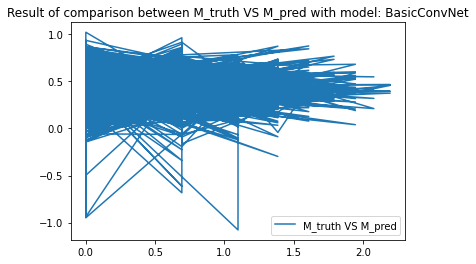

In [58]:
experiment_loop(ds_train=custom_DS_SingleValuePerImg ,ds_test=custom_DS_SingleValuePerImg_test ,phase_name='single_gene')

In [ ]:
experiment_loop(ds_train=custom_DS_SingleValuePerImg_augmented ,ds_test=custom_DS_SingleValuePerImg_test ,phase_name='single_gene')

## Phase 3: K genes prediction

In [ ]:
experiment_loop(ds_train=custom_DS_KGenesWithHighestVariance ,ds_test=custom_DS_KGenesWithHighestVariance_test ,phase_name='k_genes')

In [ ]:
experiment_loop(ds_train=custom_DS_KGenesWithHighestVariance_augmented ,ds_test=custom_DS_KGenesWithHighestVariance_test ,phase_name='k_genes')

## Phase 4: All genes prediction - using dimensionality reduction techniques

### 4.1: Prediction using dimensionality reduction technique NMF

In [ ]:
experiment_loop(ds_train=custom_DS_LatentTensor_NMF ,ds_test=custom_DS_LatentTensor_NMF_test ,phase_name='NMF')

In [ ]:
experiment_loop(ds_train=custom_DS_LatentTensor_NMF_augmented ,ds_test=custom_DS_LatentTensor_NMF_test ,phase_name='NMF')

### 4.1: Prediction using dimensionality reduction technique AE

In [ ]:
experiment_loop(ds_train=custom_DS_LatentTensor_AE ,ds_test=custom_DS_LatentTensor_AE_test ,phase_name='AE')

In [ ]:
experiment_loop(ds_train=custom_DS_LatentTensor_AE_augmented ,ds_test=custom_DS_LatentTensor_AE_test ,phase_name='AE')

<div class="alert alert-block alert-danger">
<b>Note:</b> not tested yet
</div>

In [ ]:
import numpy as np


arr1 = np.array([[1, 1], [1, 1], [1, 1], [1, 1], [1, 1]], np.int32)  # shape: 5 batch size x 2 K
print('******')
print(arr1.shape)
print(arr1)

arr2 = np.array([[2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], np.int32)  # shape: 5 batch size x 2 K
print('******')
print(arr2.shape)
print(arr2)

# Stack arrays in sequence vertically (row wise).

stacked_once = np.vstack((arr1,arr2))
print('******')
print(stacked_once.shape)
print(stacked_once)

stacked_twice = np.vstack((stacked_once,arr2))
print('******')
print(stacked_twice.shape)
print(stacked_twice)